# Anonymizing results

In this script I am removing prolific IDs and other information that could be used to identify participants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import shutil
import re
import os
import glob
import pandas as pd

In [2]:
# Update with the correct path to your JSON files
directory_path = "/Users/born/Downloads/results (23)"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))

# New directory for the modified files
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final"
os.makedirs(new_directory_path, exist_ok=True)  # Create the directory if it doesn't exist

print(f"Found {len(json_files)} JSON files.")

dataframe_list = []

for json_file in json_files:
    print(f"Processing file: {json_file}")  # Print the file being processed
    
    # Open and load the JSON file
    with open(json_file, 'r') as file:
        json_data = json.load(file)
    
    # Convert the loaded JSON data to a pandas DataFrame
    df = pd.json_normalize(json_data)
    
    # Replace the 'prolific_id' column values with "removed"
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"
    
    # Optionally add the file identifier as a new column
    file_identifier = os.path.splitext(os.path.basename(json_file))[0]
    df['file_identifier'] = file_identifier
    
    # Append the modified DataFrame to the list
    dataframe_list.append(df)

    # Save the modified DataFrame back to a JSON file in the new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    df.to_json(new_file_path, orient='records', lines=True)

# If needed, concatenate all DataFrames into a single DataFrame and process further
df_combined = pd.concat(dataframe_list, ignore_index=True)
print(f"Combined DataFrame has {df_combined.shape[0]} rows.")

# Example of working with unique identifiers
unique_subject_ids = df_combined['subject_id'].unique()  # Adjust the column name as needed

# Print the unique IDs
print(unique_subject_ids)

Found 474 JSON files.
Processing file: /Users/born/Downloads/results (23)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (23)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (23)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (23)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (23)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (23)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (23)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (23)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (23)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (23)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (23)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (23)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (23)/20

## Here I am anonomizing the datset again and saving it after excluding participants below 90 % accuracy in catch trials

In [68]:
import os
import glob
import json
import pandas as pd

# Path setup
directory_path = "/Users/born/Downloads/results (26)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials4"
os.makedirs(new_directory_path, exist_ok=True)

# Find all JSON files
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

excluded_count = 0

for json_file in json_files:
    print(f"Processing file: {json_file}")

    # Load JSON data
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    # Convert to DataFrame
    df = pd.json_normalize(json_data)

    # Check if the required columns exist to prevent errors
    if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns:
        # Filtering for catch trials and calculating performance
        catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']
        average_performance = catch_trials_df['catch_trial_correct'].mean() * 100
        
        # Exclude participants with performance below 90%
        if average_performance < 90:
            excluded_count += 1
            continue

    # Anonymize data
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"

    # Save to new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    with open(new_file_path, 'w') as f:
        json.dump(df.to_dict('records'), f)

# Reporting
print(f"Excluded {excluded_count} files based on performance criteria.")
print(f"Processed and saved {len(json_files) - excluded_count} files with performance >= 90%.")


Found 496 JSON files.
Processing file: /Users/born/Downloads/results (25)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (25)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (25)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (25)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (25)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (25)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (25)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (25)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (25)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (25)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (25)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (25)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (25)/20

In [78]:
import os
import glob
import json
import pandas as pd

# Path setup
directory_path = "/Users/born/Downloads/results (27)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials3"
os.makedirs(new_directory_path, exist_ok=True)

# Find all JSON files
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

excluded_count = 0

for json_file in json_files:
    print(f"Processing file: {json_file}")

    # Load JSON data
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    # Convert to DataFrame
    df = pd.json_normalize(json_data)

    # Check for 'selected_image' occurrences of "No image selected"
    if 'selected_image' in df.columns:
        no_image_count = (df['selected_image'] == "No image selected").sum()
        if no_image_count > 10:
            excluded_count += 1
            continue  # Skip saving this participant's data

    # Check if the required columns for catch trials exist to prevent errors
    if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns:
        # Filtering for catch trials and calculating performance
        catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']
        average_performance = catch_trials_df['catch_trial_correct'].mean() * 100
        
        # Exclude participants with performance below 90%
        if average_performance < 90:
            excluded_count += 1
            continue

    # Anonymize data
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"

    # Save to new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    with open(new_file_path, 'w') as f:
        json.dump(df.to_dict('records'), f)

# Reporting
print(f"Excluded {excluded_count} files based on performance and missed responses criteria.")
print(f"Processed and saved {len(json_files) - excluded_count} files.")


Found 501 JSON files.
Processing file: /Users/born/Downloads/results (27)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (27)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (27)/20

## Here I am going back to saving the data as a single .json object per trial

In [80]:
# Path setup for both loading and saving
directory_path = "/Users/born/Downloads/results (27)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_perf_outliers"
os.makedirs(new_directory_path, exist_ok=True)

# Find all JSON files
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

excluded_count = 0
dataframe_list = []

for json_file in json_files:
    print(f"Processing file: {json_file}")

    # Load JSON data
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    # Convert to DataFrame
    df = pd.json_normalize(json_data)

    # Perform checks and filter data
    # Check for 'selected_image' occurrences of "No image selected"
    no_image_count = df['selected_image'].eq("No image selected").sum() if 'selected_image' in df.columns else 0
    catch_trial_performance = df[df['exp_trial_type'].eq('catch_trial')]['catch_trial_correct'].mean() * 100 if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns else 100

    # Apply exclusion criteria
    if no_image_count > 10 or catch_trial_performance < 90:
        excluded_count += 1
        continue  # Skip saving this participant's data

    # Anonymize data by removing Prolific ID
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"

    # Optionally add the file identifier as a new column
    file_identifier = os.path.splitext(os.path.basename(json_file))[0]
    df['file_identifier'] = file_identifier

    # Append the modified DataFrame to the list for further processing or concatenation
    dataframe_list.append(df)

    # Save the modified DataFrame back to a JSON file in the new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    df.to_json(new_file_path, orient='records', lines=True)  # Ensure line-delimited JSON

# Concatenate all modified DataFrames into a single DataFrame for further processing
df_combined = pd.concat(dataframe_list, ignore_index=True)
print(f"Combined DataFrame has {df_combined.shape[0]} rows.")
print(f"Excluded {excluded_count} files based on performance and missed responses criteria.")
print(f"Processed and saved {len(json_files) - excluded_count} files.")

# Display unique subject IDs from the combined DataFrame
unique_subject_ids = df_combined['subject_id'].unique()
print("Unique Subject IDs:", unique_subject_ids)


Found 501 JSON files.
Processing file: /Users/born/Downloads/results (27)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (27)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (27)/20

##  check of there are now any untested files

In [79]:
import os
import glob
import json
import pandas as pd

# Define the directory path containing the JSON files
directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials3"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

all_data = []

# Load data from each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        # Load the JSON data from the file
        json_data = json.load(file)
        # If your JSON data is nested, you might need to adjust the record_path
        # For flat structures, this step can be simplified
        df = pd.json_normalize(json_data)
        all_data.append(df)  # Append the DataFrame to the list

# Concatenate all dataframes in the list into one dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Assume df_combined is already available
# Ensure all entries are strings and filter out any that don't start with 'participant_'
subject_ids = df_combined['subject_id'].dropna().astype(str)
filtered_ids = [id for id in subject_ids if id.startswith('participant_')]

# Extract numbers from valid 'participant_x' formatted strings
participant_numbers = []
for id in filtered_ids:
    parts = id.split('_')
    if len(parts) == 2 and parts[1].isdigit():
        participant_numbers.append(int(parts[1]))

# Sort participant numbers
participant_numbers_sorted = np.sort(participant_numbers)

# Generate the complete range of expected IDs (0 to 449)
expected_ids = np.arange(0, 450)

# Find missing IDs by comparing the actual IDs to the expected range
missing_ids = np.setdiff1d(expected_ids, participant_numbers_sorted)

# Print missing IDs
print("Missing participant IDs:", missing_ids)


Found 473 JSON files.
Missing participant IDs: []


In [62]:
import pandas as pd
from collections import Counter

# Assuming df_combined is already available
# Ensure all entries are strings and filter out any that don't start with 'participant_'
subject_ids = df_combined['subject_id'].dropna().astype(str)
filtered_ids = [id for id in subject_ids if id.startswith('participant_')]

# Track occurrences of each ID
occurrences = Counter(filtered_ids)

# Filter for IDs with more than 1080 duplicates
high_duplicate_ids = {id: count for id, count in occurrences.items() if count > 1080}

# Print IDs with more than 1080 occurrences
if high_duplicate_ids:
    print("Participant IDs with more than 1080 duplicates and their counts:")
    for participant_id, count in high_duplicate_ids.items():
        print(f"ID: {participant_id}, Count: {count}")
else:
    print("No participant IDs found with more than 1080 duplicates.")


Participant IDs with more than 1080 duplicates and their counts:
ID: participant_310, Count: 2143
ID: participant_338, Count: 2146
ID: participant_127, Count: 2144
ID: participant_132, Count: 2142
ID: participant_126, Count: 2140
ID: participant_182, Count: 2141
ID: participant_131, Count: 2143
ID: participant_300, Count: 2144
ID: participant_286, Count: 2144
ID: participant_289, Count: 2151
ID: participant_290, Count: 2141
ID: participant_319, Count: 2142
ID: participant_125, Count: 2141
ID: participant_134, Count: 2140
ID: participant_322, Count: 2140
ID: participant_440, Count: 2142
ID: participant_291, Count: 2141
ID: participant_117, Count: 2140
ID: participant_185, Count: 2142
ID: participant_292, Count: 2144
ID: participant_275, Count: 2140
ID: participant_311, Count: 2140
ID: participant_330, Count: 2144


In [65]:
import pandas as pd

# Assuming df_combined is already available and contains the columns 'subject_id' and 'selected_image'
# Count occurrences of "No image selected" per participant in the 'selected_image' column

# Create a new column to identify rows where 'selected_image' is "No image selected"
df_combined['no_image_selected'] = (df_combined['selected_image'] == "No image selected")

# Group by 'subject_id' and sum the True values in 'no_image_selected'
no_image_counts = df_combined.groupby('subject_id')['no_image_selected'].sum()

# Convert the series to a DataFrame and rename the column
no_image_counts_df = no_image_counts.reset_index()
no_image_counts_df.rename(columns={'no_image_selected': 'No_Image_Selected_Count'}, inplace=True)

# Filter to find participants with more than 2 occurrences of "No image selected"
participants_above_threshold = no_image_counts_df[no_image_counts_df['No_Image_Selected_Count'] > 2]

# Print the filtered DataFrame
print(participants_above_threshold)



          subject_id  No_Image_Selected_Count
5    participant_102                        4
11   participant_108                       21
22   participant_118                        4
32   participant_127                        3
33   participant_128                        4
55   participant_148                        3
69   participant_160                       10
70   participant_161                       34
85   participant_175                        3
95   participant_184                        3
99   participant_188                        4
101   participant_19                        3
102  participant_190                        3
109  participant_197                        7
146   participant_23                       10
147  participant_230                        3
152  participant_235                       17
155  participant_238                        4
172  participant_253                        4
187  participant_267                       40
193  participant_272              

Found 472 JSON files.


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/1788412308.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject_id', y='Performance', data=performance_per_participant, palette='viridis')


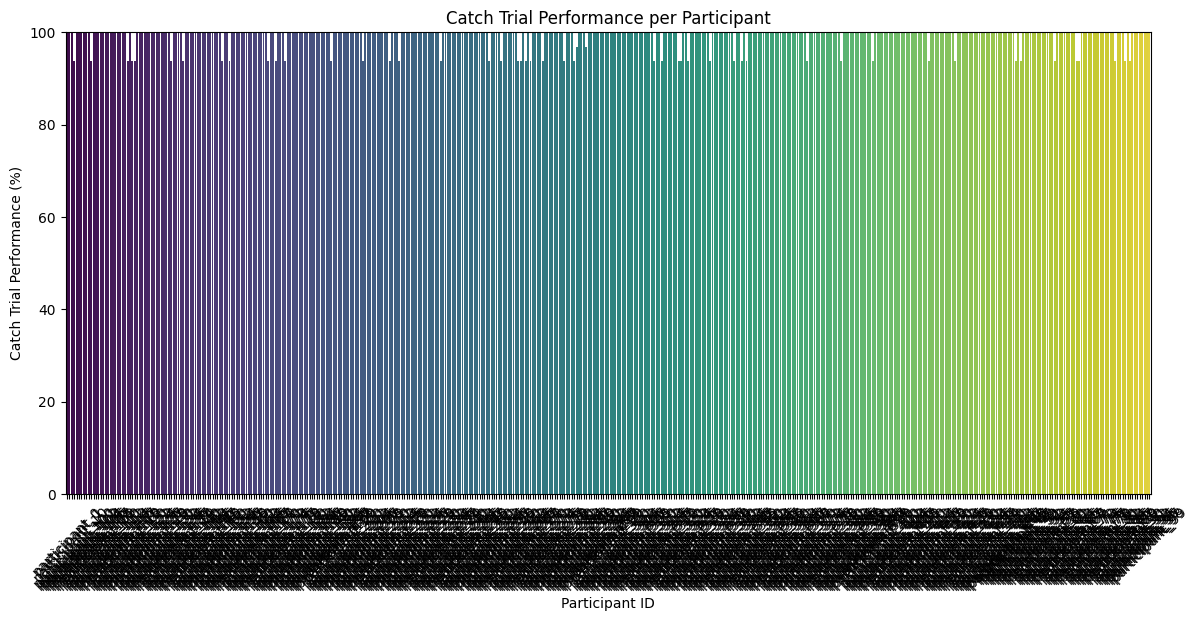

In [46]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing the processed JSON files
directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials"

# Find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

all_data = []

# Load data from each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)  # Load the entire JSON object from the file
        all_data.extend(data)  # Assuming each JSON object is a list of dictionaries

# Convert the list of all data into a DataFrame
df = pd.DataFrame(all_data)

# Filter DataFrame for catch trials only
if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns:
    catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']
    
    # Calculate accuracy per participant
    performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
    performance_per_participant = performance_per_participant.reset_index(name='Performance')

    # Plotting
    plt.figure(figsize=(14, 6))
    sns.barplot(x='subject_id', y='Performance', data=performance_per_participant, palette='viridis')
    plt.xlabel('Participant ID')
    plt.ylabel('Catch Trial Performance (%)')
    plt.title('Catch Trial Performance per Participant')
    plt.ylim(0, 100)  # Set y-axis limits to show percentages from 0 to 100
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()
else:
    print("The necessary columns for processing catch trial performance are missing.")


Found 472 JSON files.


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/1203686934.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=18)


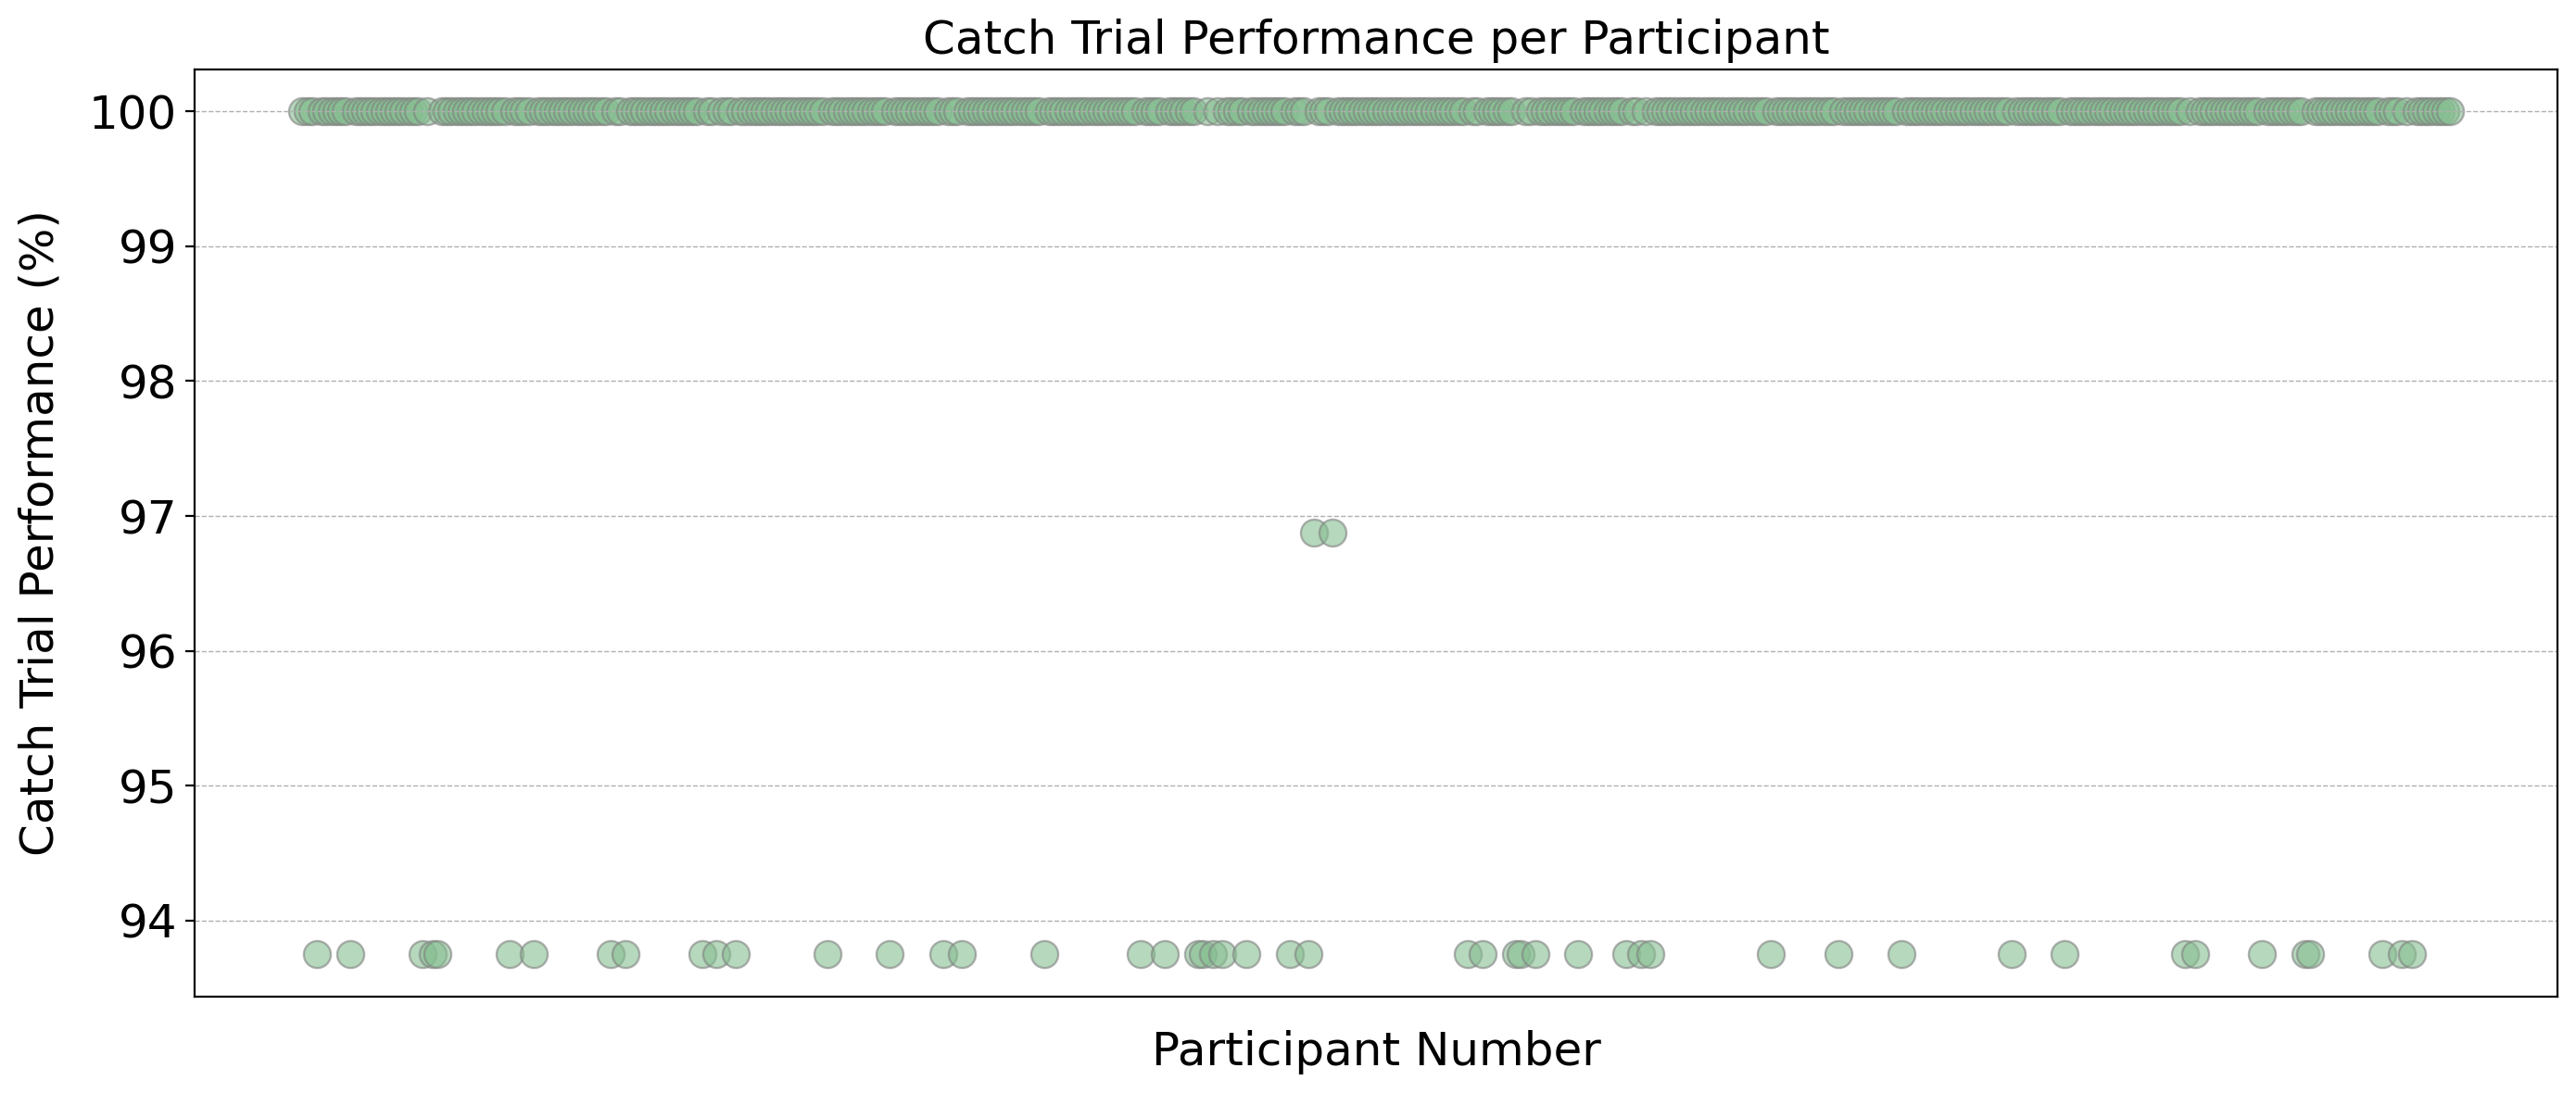

<Figure size 640x480 with 0 Axes>

In [50]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing the processed JSON files
directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials"

# Find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

all_data = []

# Load data from each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)  # Load the entire JSON object from the file
        all_data.extend(data)  # Assuming each JSON object is a list of dictionaries

# Convert the list of all data into a DataFrame
df = pd.DataFrame(all_data)

# Filter DataFrame for catch trials only
if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns:
    catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']
    
    # Calculate accuracy per participant
    performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
    performance_per_participant = performance_per_participant.reset_index(name='Performance')

    # Prepare the plot
    fig, ax = plt.subplots(figsize=(14, 6), dpi=200)  # Size and resolution as specified

    # Plotting with seaborn
    sns.scatterplot(
        x=performance_per_participant.index,  # Use the DataFrame index as x
        y='Performance',  # Use 'Performance' for the y-axis
        data=performance_per_participant,  # Explicitly specify the data
        s=110,  # Dot size
        color="#86be91",  # Uniform color
        edgecolor='grey',  # Edge color
        alpha=0.6 # Some transparency
    )

    # Customizing the plot
    ax.set_xlabel('Participant Number', fontsize=18, labelpad=13)  # Set x-axis label properties
    ax.set_ylabel('Catch Trial Performance (%)', fontsize=18, labelpad=10)  # Set y-axis label properties
    ax.set_title('Catch Trial Performance per Participant', fontsize=18)  # Title with font size
    ax.set_xticks([])  # Remove x-axis labels
    yticklabels = [label.get_text() for label in ax.get_yticklabels()]
    ax.set_yticklabels(yticklabels, fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability

    fig.tight_layout()  # Adjust layout
    plt.show()

    # Optional: save the plot
    path_to_figures = "/Users/born/Documents/GitHub_Projects/HumanEval/client/public/figures"
    plt.savefig(os.path.join(path_to_figures, "catch_trials_performance.png"), dpi=300, bbox_inches='tight')
else:
    print("The necessary columns for processing catch trial performance are missing.")


In [52]:
import pandas as pd
import numpy as np

# Assume df_combined is already available
# Ensure all entries are strings and filter out any that don't start with 'participant_'
subject_ids = df_combined['subject_id'].dropna().astype(str)
filtered_ids = [id for id in subject_ids if id.startswith('participant_')]

# Extract numbers from valid 'participant_x' formatted strings
participant_numbers = []
for id in filtered_ids:
    parts = id.split('_')
    if len(parts) == 2 and parts[1].isdigit():
        participant_numbers.append(int(parts[1]))

# Sort participant numbers
participant_numbers_sorted = np.sort(participant_numbers)

# Generate the complete range of expected IDs (0 to 449)
expected_ids = np.arange(0, 450)

# Find missing IDs by comparing the actual IDs to the expected range
missing_ids = np.setdiff1d(expected_ids, participant_numbers_sorted)

# Print missing IDs
print("Missing participant IDs:", missing_ids)




Missing participant IDs: []


In [5]:
import os
import glob
import json
import pandas as pd

# Define the directory paths
directory_path = "/Users/born/Downloads/results (23)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_prefinal"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
os.makedirs(new_directory_path, exist_ok=True)  # Ensure the new directory exists

# Dictionary to track which files each subject_id appears in
subject_file_mapping = {}

# Process each JSON file
for json_file in json_files:
    with open(json_file, 'r') as file:
        json_data = json.load(file)
    
    # Assume the JSON data is an array of records; adjust as necessary
    df = pd.json_normalize(json_data)
    
    if 'subject_id' in df.columns:
        # Iterate over unique subject_ids in the DataFrame
        for subject_id in df['subject_id'].unique():
            if subject_id in subject_file_mapping:
                subject_file_mapping[subject_id].append(os.path.basename(json_file))
            else:
                subject_file_mapping[subject_id] = [os.path.basename(json_file)]

# Identify subject_ids that appear in more than one file
duplicates = {sub_id: files for sub_id, files in subject_file_mapping.items() if len(files) > 1}

# Display results
print("Subject IDs appearing in multiple files:")
for subject_id, files in duplicates.items():
    print(f"{subject_id} appears in {len(files)} files: {files}")

    ID: participant_310, Count: 2143
ID: participant_338, Count: 2146
ID: participant_46, Count: 1084
ID: participant_127, Count: 2144
ID: participant_132, Count: 2142
ID: participant_126, Count: 2140
ID: participant_182, Count: 2141
ID: participant_131, Count: 2143
ID: participant_300, Count: 2144
ID: participant_286, Count: 2144
ID: participant_289, Count: 2151
ID: participant_290, Count: 2141
ID: participant_319, Count: 2142
ID: participant_125, Count: 2141
ID: participant_134, Count: 2140
ID: participant_322, Count: 2140
ID: participant_440, Count: 2142
ID: participant_291, Count: 2141
ID: participant_161, Count: 1104
ID: participant_117, Count: 2140
ID: participant_64, Count: 1091
ID: participant_185, Count: 2142
ID: participant_108, Count: 1091
ID: participant_292, Count: 2144
...
ID: participant_330, Count: 2144
ID: participant_278, Count: 1084
ID: participant_267, Count: 1111
ID: participant_417, Count: 1090


Subject IDs appearing in multiple files:
nan appears in 45 files: ['2024-04-15 12_47_36.json', '2024-04-16 17_29_54.json', '2024-04-14 20_50_51.json', '2024-04-15 20_31_54.json', '2024-04-14 21_57_31.json', '2024-04-12 10_48_38.json', '2024-04-14 23_23_04.json', '2024-04-15 19_56_39.json', '2024-04-16 12_23_04.json', '2024-04-14 21_24_27.json', '2024-04-14 10_53_51.json', '2024-04-14 10_54_55.json', '2024-04-16 11_36_13.json', '2024-04-11 12_48_53.json', '2024-04-15 12_17_24.json', '2024-04-13 22_28_37.json', '2024-04-11 21_29_40.json', '2024-04-13 21_06_59.json', '2024-04-16 16_47_22.json', '2024-04-16 18_51_45.json', '2024-04-16 11_26_35.json', '2024-04-15 18_43_38.json', '2024-04-13 18_44_46.json', '2024-04-16 09_00_09.json', '2024-04-15 10_12_59.json', '2024-04-14 10_31_34.json', '2024-04-15 20_43_26.json', '2024-04-14 21_53_00.json', '2024-04-15 19_49_54.json', '2024-04-14 11_28_00.json', '2024-04-14 11_05_46.json', '2024-04-16 08_46_41.json', '2024-04-15 20_42_41.json', '2024-04-

In [10]:
import os
import glob
import json
import pandas as pd

# Define the directory paths
directory_path = "/Users/born/Downloads/results (20)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_prefinal"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
os.makedirs(new_directory_path, exist_ok=True)  # Ensure the new directory exists

# List to track files with undefined or missing subject_id
files_with_missing_subject_id = []

# Process each JSON file
for json_file in json_files:
    with open(json_file, 'r') as file:
        json_data = json.load(file)
    
    # Normalize JSON data into a DataFrame
    df = pd.json_normalize(json_data)
    
    # Check if 'subject_id' is in the DataFrame columns
    if 'subject_id' not in df.columns:
        files_with_missing_subject_id.append(os.path.basename(json_file))
    else:
        # Check if all entries for 'subject_id' are null
        if df['subject_id'].isnull().all():
            files_with_missing_subject_id.append(os.path.basename(json_file))

# Display results
if files_with_missing_subject_id:
    print("Files with undefined or missing subject_id:")
    for filename in files_with_missing_subject_id:
        print(filename)
else:
    print("No files with undefined or missing subject_id.")


No files with undefined or missing subject_id.


## Cheching if I can load the files after they have been anonomized before sharing with Lukas

In [4]:
# Specify the path to one of the modified JSON files
file_path = "/Users/born/Downloads/nonidentifiable_results_exp_prefinal/2024-04-11 11_00_10.json"  

# Read the JSON file into a DataFrame
df = pd.read_json(file_path, lines=True)  

# Display the DataFrame
print(df.head())  

        rt                                              url     trial_type  \
0   5323.0  stimuli/consent_form/EXTERNAL_CONSENT_PAGE.HTML  external-html   
1    803.0                                             None     fullscreen   
2   4235.0                                             None         survey   
3      NaN                                             None        preload   
4  29573.0                                             None   instructions   

   trial_index  time_elapsed internal_node_id                    start  \
0            0          5409      0.0-0.0-0.0  2024-04-11 08:29:43.258   
1            1          7231      0.0-0.0-1.0  2024-04-11 08:29:43.258   
2            2         11531      0.0-0.0-2.0  2024-04-11 08:29:43.258   
3            3         57240      0.0-0.0-3.0  2024-04-11 08:29:43.258   
4            4         86819      0.0-0.0-4.0  2024-04-11 08:29:43.258   

       subject_id                  study_id     OS  ... catch_trial_correct  \
0  part

### Check for prolific PID to make sure it's removed

In [5]:
if 'prolific_id' in df.columns:
    print(df['prolific_id'].head())
else:
    print("Column 'prolific_id' does not exist in the DataFrame.")

0    removed
1    removed
2    removed
3    removed
4    removed
Name: prolific_id, dtype: object


In [6]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Update with the correct path to your JSON files
directory_path = "/Users/born/Downloads/results (23)"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))

# List to hold data from all JSON files
all_data = []

# Load each JSON file and append the data to the list
for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.extend(data)  # Assuming each file contains a list of records

# Convert the list of all data into a DataFrame
df = pd.json_normalize(all_data)


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/454396258.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_per_participant, x='subject_id', y='Performance', palette='viridis')


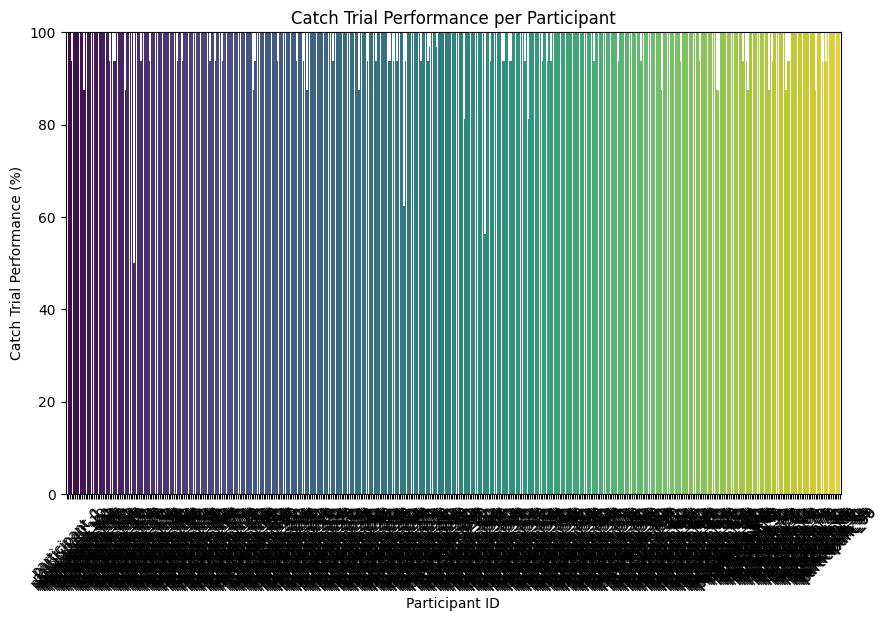

Number of catch trials per participant:
subject_id
participant_0      16
participant_1      16
participant_10     16
participant_100    16
participant_101    16
                   ..
participant_95     16
participant_96     16
participant_97     16
participant_98     16
participant_99     16
Length: 448, dtype: int64


In [31]:
# Filter for 'catch_trial'
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100

# Reset index to prepare for plotting
performance_per_participant = performance_per_participant.reset_index(name='Performance')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_per_participant, x='subject_id', y='Performance', palette='viridis')
plt.xlabel('Participant ID')
plt.ylabel('Catch Trial Performance (%)')
plt.title('Catch Trial Performance per Participant')
plt.ylim(0, 100)  # Set y-axis limits to show percentages from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save the plot as a high-resolution image file in the environment's accessible path
plt.savefig("/Users/born/Downloads/catch_trial_performance_per_participant.png", dpi=300, bbox_inches='tight')

plt.show()

# Counting the number of catch trials per participant
number_of_catch_trials_per_participant = catch_trials_df.groupby('subject_id').size()

# Printing the number of catch trials for each participant
print("Number of catch trials per participant:")
print(number_of_catch_trials_per_participant)


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/3403069771.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklables, fontsize=18)


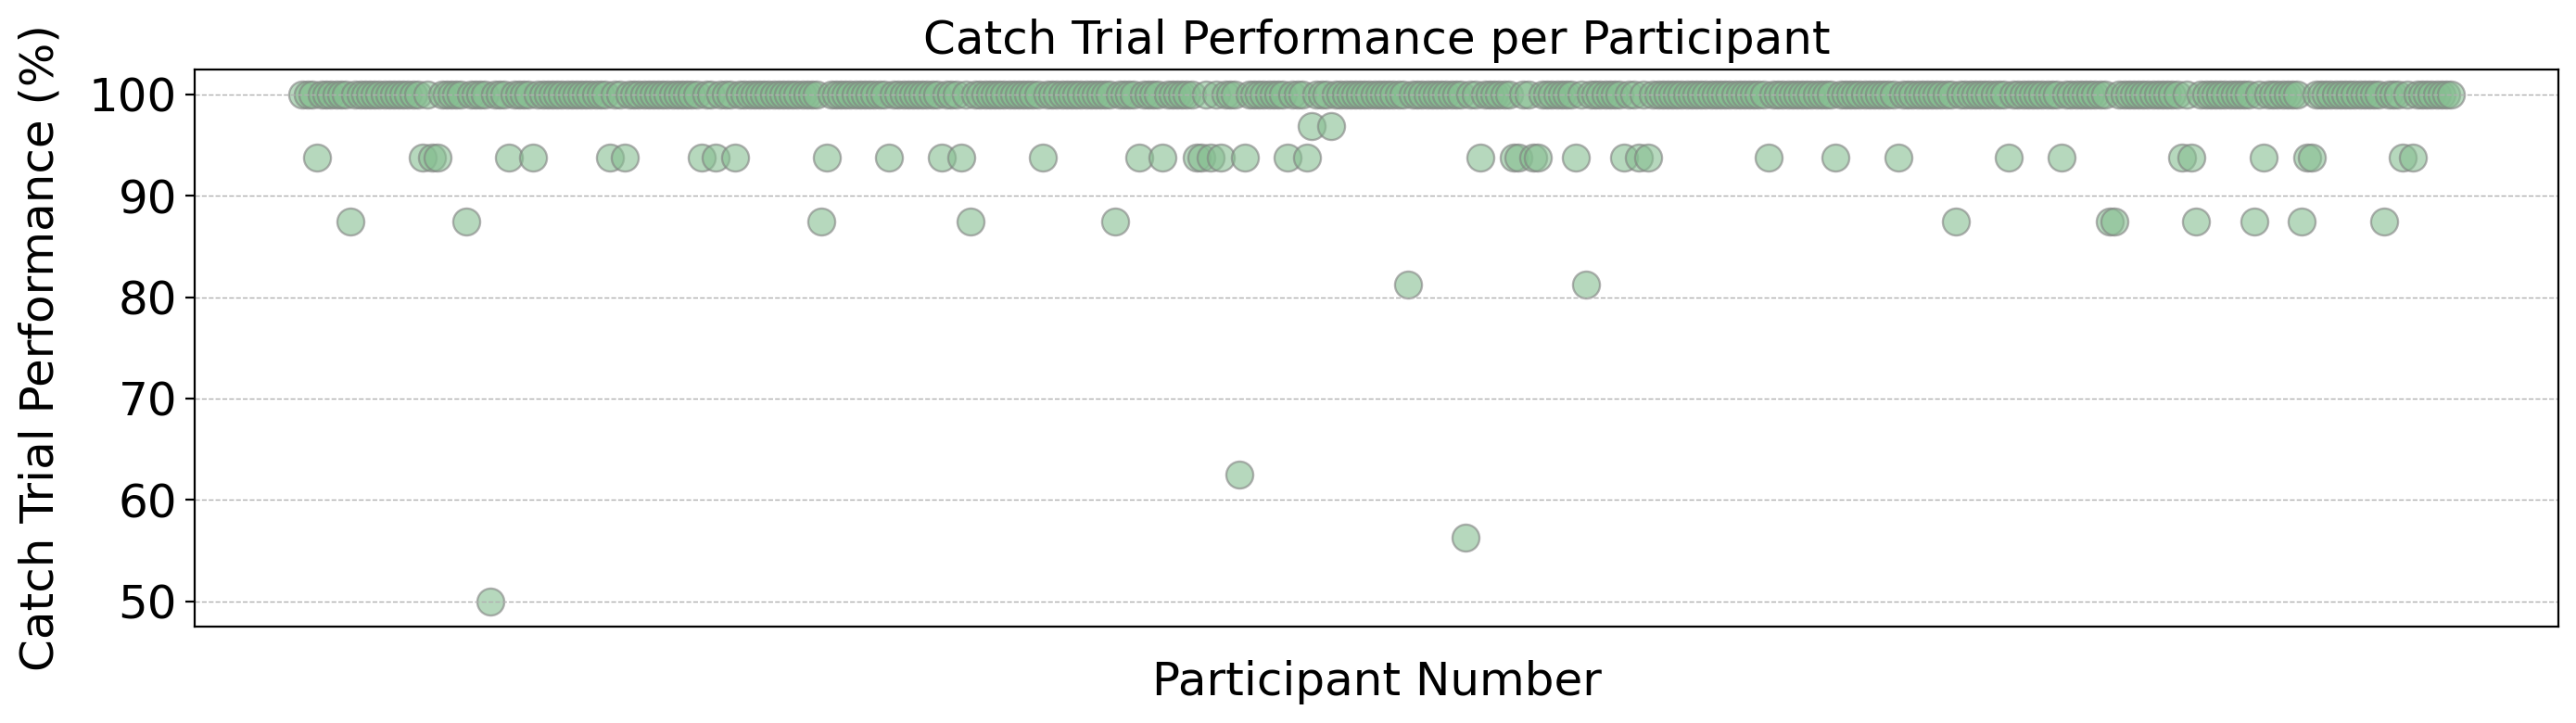

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path_to_figures = "/Users/born/Documents/GitHub_Projects/HumanEval/client/public/figures"

# Assuming catch_trials_df is your filtered DataFrame with only 'catch_trial' type trials
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100

# Reset index to get 'subject_id' back as a column
performance_per_participant = performance_per_participant.reset_index()

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 4), dpi=200)  # Size and resolution as specified

# Plotting with seaborn
sns.scatterplot(
    x=performance_per_participant.index,  # Use the DataFrame index as x
    y='catch_trial_correct',  # Use 'catch_trial_correct' for the y-axis
    data=performance_per_participant,  # Explicitly specify the data
    s=110,  # Dot size
    color="#86be91",  # Uniform blue color
    edgecolor='grey',  # No edge colors
    alpha=0.6 # Some transparency
)

# Customizing the plot
ax.set_xlabel('Participant Number', fontsize=18, labelpad=13)  # Set x-axis label properties
ax.set_ylabel('Catch Trial Performance (%)', fontsize=18, labelpad=10)  # Set y-axis label properties
ax.set_title('Catch Trial Performance per Participant', fontsize=18)  # Title with font size
ax.set_xticks([])  # Remove x-axis labels
yticklables = ax.get_yticklabels()
ax.set_yticklabels(yticklables, fontsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability

fig.tight_layout()  # Adjust layout
plt.show()

# Optional: save the plot
plt.savefig(os.path.join(path_to_figures, "catch_trials.png"), bbox_inches="tight")


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/1346426308.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


ValueError: RGBA sequence should have length 3 or 4

Error in callback <function _draw_all_if_interactive at 0x7fc449c25940> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

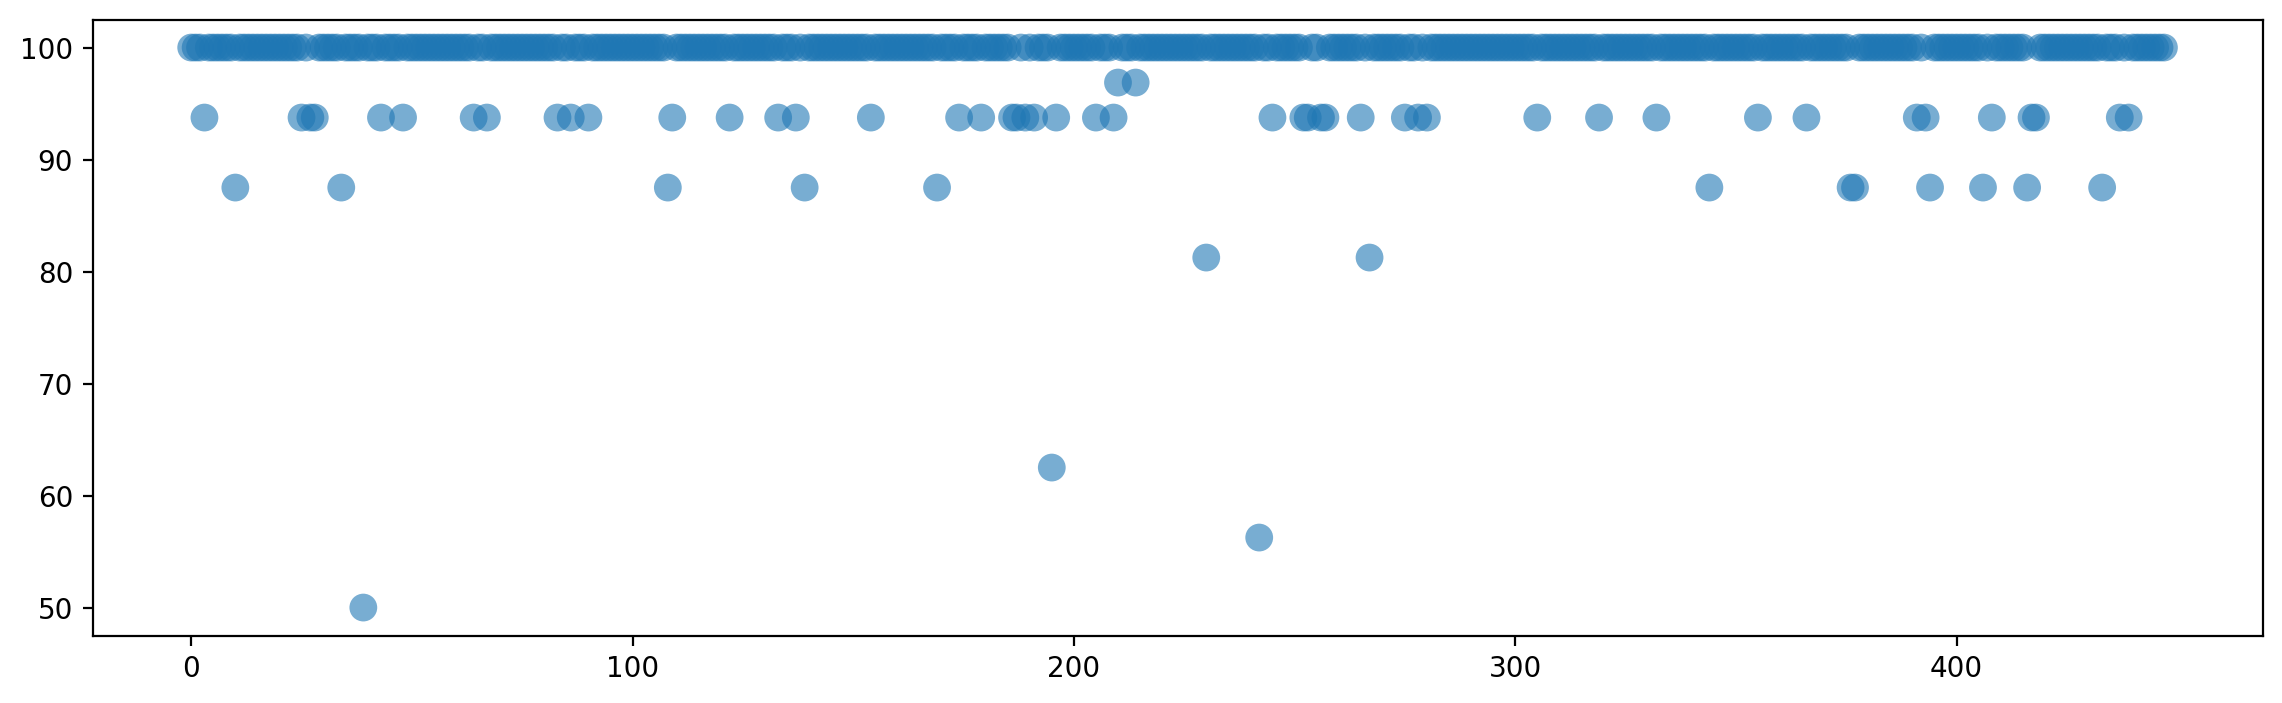

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming catch_trials_df is your filtered DataFrame with only 'catch_trial' type trials
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100

# Reset index to get 'subject_id' back as a column
performance_per_participant = performance_per_participant.reset_index()

# Define colors based on performance
performance_per_participant['color'] = performance_per_participant['catch_trial_correct'].apply(
    lambda x: '#1d6c8a' if x >= 90 else '#add8e6')  # Light blue for below 90%

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 4), dpi=200)  # Size and resolution as specified

# Plotting with seaborn
sns.scatterplot(
    x=performance_per_participant.index,  # Use the DataFrame index as x
    y='catch_trial_correct',  # Use 'catch_trial_correct' for the y-axis
    data=performance_per_participant,  # Explicitly specify the data
    s=100,  # Dot size
    hue=performance_per_participant['color'],  # Color based on performance
    palette=[performance_per_participant['color']],  # Define the palette based on the 'color' column
    edgecolor='none',  # No edge colors
    alpha=0.6  # Some transparency
)

# Customizing the plot
ax.set_xlabel('Participant Index', fontsize=18, labelpad=13)  # Set x-axis label properties
ax.set_ylabel('Catch Trial Performance (%)', fontsize=18, labelpad=10)  # Set y-axis label properties
ax.set_title('Catch Trial Performance per Participant', fontsize=18)  # Title with font size
ax.set_xticks([])  # Remove x-axis labels
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
ax.legend(title='Performance', loc='upper right', labels=['>= 90%', '< 90%'])  # Adjust legend to reflect the color coding

fig.tight_layout()  # Adjust layout
plt.show()

# Optional: save the plot
# plt.savefig("/path/to/your/directory/catch_trial_performance_plot.png", dpi=300, bbox_inches='tight')


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/1154751687.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')


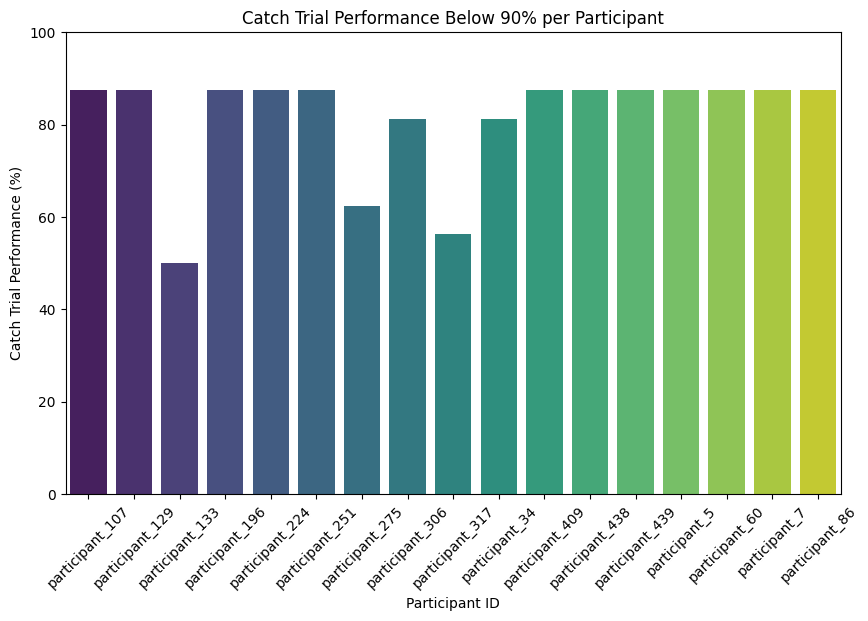

Number of incorrect catch trials per low-performing participant:
subject_id
participant_107     2
participant_129     2
participant_133     8
participant_196     2
participant_224     2
participant_251     2
participant_275    12
participant_306     3
participant_317     7
participant_34      3
participant_409     2
participant_438     2
participant_439     2
participant_5       2
participant_60      2
participant_7       2
participant_86      2
Name: catch_trial_correct, dtype: int64


In [33]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all JSON files from a specified directory
directory_path = "/Users/born/Downloads/results (23)"
json_files = glob.glob(os.path.join(directory_path, "*.json"))
all_data = []

for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.extend(data)  # Assuming each file contains a list of records

# Convert the list of all data into a DataFrame
df = pd.json_normalize(all_data)

# Filtering for catch trials
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
performance_per_participant = performance_per_participant.reset_index(name='Performance')

# Filter to show only participants with performance below 90%
low_performance_participants = performance_per_participant[performance_per_participant['Performance'] < 90]

# Plotting low performance participants
plt.figure(figsize=(10, 6))
sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')
plt.xlabel('Participant ID')
plt.ylabel('Catch Trial Performance (%)')
plt.title('Catch Trial Performance Below 90% per Participant')
plt.ylim(0, 100)  # Set y-axis limits to show percentages from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig("/Users/born/Downloads/catch_trial_performance_below_90.png", dpi=300, bbox_inches='tight')
plt.show()

# Counting the number of incorrect catch trials per participant who performed below 90%
incorrect_trials_per_low_performers = catch_trials_df[catch_trials_df['subject_id'].isin(low_performance_participants['subject_id'])].groupby('subject_id')['catch_trial_correct'].apply(lambda x: (x == 0).sum())

# Printing the number of incorrect catch trials for each low-performing participant
print("Number of incorrect catch trials per low-performing participant:")
print(incorrect_trials_per_low_performers)


In [ ]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory path
directory_path = "/Users/born/Downloads/results (23)"
json_files = glob.glob(os.path.join(directory_path, "*.json"))

# List for storing all data
all_data = []

# Process each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        file_suffix = os.path.splitext(os.path.basename(file_path))[0]  # Extract file name without extension

        # Append a unique suffix to each subject_id
        for entry in data:
            if 'subject_id' in entry:
                entry['subject_id'] = f"{entry['subject_id']}.{file_suffix}"

        all_data.extend(data)

# Convert all data into a DataFrame
df = pd.json_normalize(all_data)

# Filter for 'catch_trial'
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
performance_per_participant = performance_per_participant.reset_index(name='Performance')

# Filter to show only participants with performance below 90%
low_performance_participants = performance_per_participant[performance_per_participant['Performance'] < 90]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')
plt.xlabel('Participant ID')
plt.ylabel('Catch Trial Performance (%)')
plt.title('Catch Trial Performance Below 90% per Participant')
plt.ylim(0, 100)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.savefig("/Users/born/Downloads/catch_trial_performance_below_90.png", dpi=300, bbox_inches='tight')
plt.show()

# Counting the number of incorrect catch trials per participant who performed below 90%
incorrect_trials_per_low_performers = catch_trials_df[catch_trials_df['subject_id'].isin(low_performance_participants['subject_id'])].groupby('subject_id')['catch_trial_correct'].apply(lambda x: (x == 0).sum())

# Printing the number of incorrect catch trials for each low-performing participant
print("Number of incorrect catch trials per low-performing participant:")
print(incorrect_trials_per_low_performers)


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_72357/99818383.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')


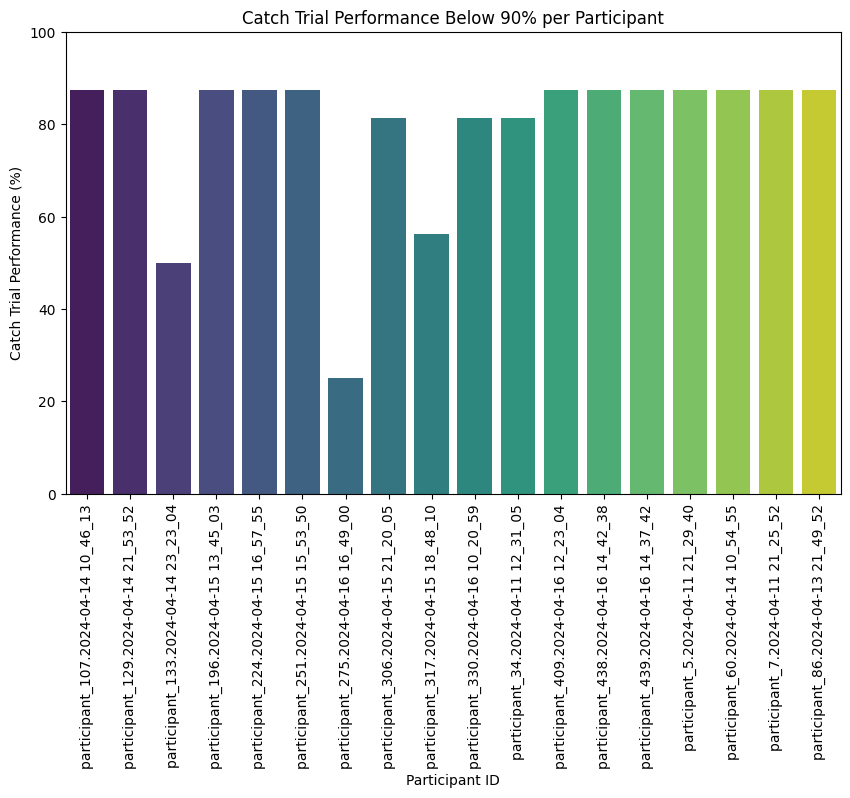

Number of incorrect catch trials per low-performing participant:
subject_id
participant_107.2024-04-14 10_46_13     2
participant_129.2024-04-14 21_53_52     2
participant_133.2024-04-14 23_23_04     8
participant_196.2024-04-15 13_45_03     2
participant_224.2024-04-15 16_57_55     2
participant_251.2024-04-15 15_53_50     2
participant_275.2024-04-16 16_49_00    12
participant_306.2024-04-15 21_20_05     3
participant_317.2024-04-15 18_48_10     7
participant_330.2024-04-16 10_20_59     3
participant_34.2024-04-11 12_31_05      3
participant_409.2024-04-16 12_23_04     2
participant_438.2024-04-16 14_42_38     2
participant_439.2024-04-16 14_37_42     2
participant_5.2024-04-11 21_29_40       2
participant_60.2024-04-14 10_54_55      2
participant_7.2024-04-11 21_25_52       2
participant_86.2024-04-13 21_49_52      2
Name: catch_trial_correct, dtype: int64


In [10]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory path
directory_path = "/Users/born/Downloads/results (23)"
json_files = glob.glob(os.path.join(directory_path, "*.json"))

# List for storing all data
all_data = []

# Process each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        file_suffix = os.path.splitext(os.path.basename(file_path))[0]  # Extract file name without extension

        # Append a unique suffix to each subject_id
        for entry in data:
            if 'subject_id' in entry:
                entry['subject_id'] = f"{entry['subject_id']}.{file_suffix}"

        all_data.extend(data)

# Convert all data into a DataFrame
df = pd.json_normalize(all_data)

# Filter for 'catch_trial'
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
performance_per_participant = performance_per_participant.reset_index(name='Performance')

# Filter to show only participants with performance below 90%
low_performance_participants = performance_per_participant[performance_per_participant['Performance'] < 90]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')
plt.xlabel('Participant ID')
plt.ylabel('Catch Trial Performance (%)')
plt.title('Catch Trial Performance Below 90% per Participant')
plt.ylim(0, 100)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.savefig("/Users/born/Downloads/catch_trial_performance_below_90.png", dpi=300, bbox_inches='tight')
plt.show()

# Counting the number of incorrect catch trials per participant who performed below 90%
incorrect_trials_per_low_performers = catch_trials_df[catch_trials_df['subject_id'].isin(low_performance_participants['subject_id'])].groupby('subject_id')['catch_trial_correct'].apply(lambda x: (x == 0).sum())

# Printing the number of incorrect catch trials for each low-performing participant
print("Number of incorrect catch trials per low-performing participant:")
print(incorrect_trials_per_low_performers)
